In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Covid**

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [4]:
img_height, img_width = 128, 128
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/archive (6)/Covid19-dataset/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/archive (6)/Covid19-dataset/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


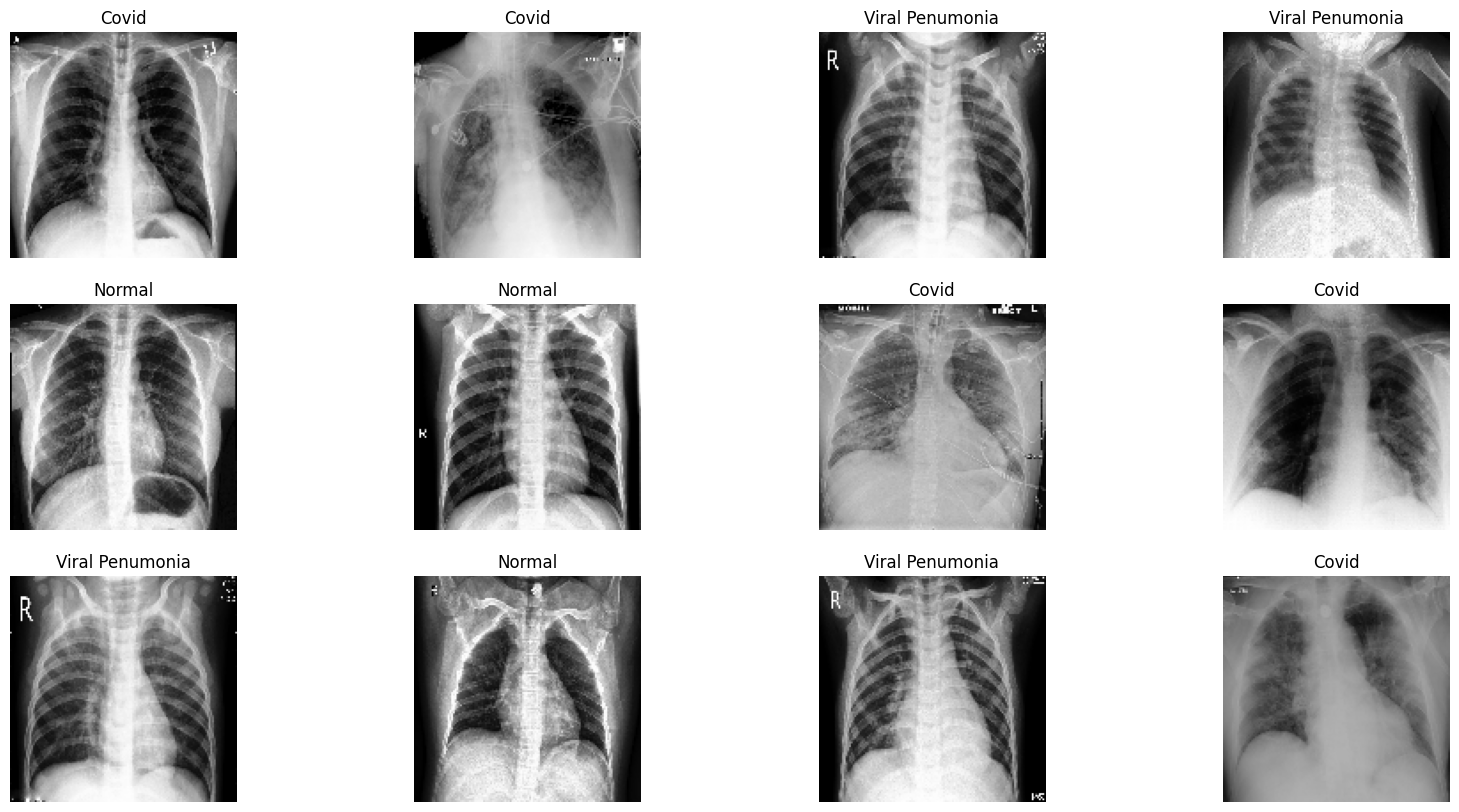

In [5]:
class_names = ['Covid','Normal','Viral Penumonia']
plt.figure(figsize=(20,10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [7]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [8]:
model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = 15
)

Epoch 1/15
13/13 [==============================] - 32s 2s/step - loss: 1.1316 - accuracy: 0.4462 - val_loss: 0.9915 - val_accuracy: 0.5152
Epoch 2/15
13/13 [==============================] - 4s 178ms/step - loss: 0.7005 - accuracy: 0.7928 - val_loss: 0.4384 - val_accuracy: 0.8485
Epoch 3/15
13/13 [==============================] - 4s 171ms/step - loss: 0.3363 - accuracy: 0.8446 - val_loss: 0.6213 - val_accuracy: 0.7121
Epoch 4/15
13/13 [==============================] - 5s 160ms/step - loss: 0.2174 - accuracy: 0.9163 - val_loss: 0.6876 - val_accuracy: 0.7273
Epoch 5/15
13/13 [==============================] - 4s 160ms/step - loss: 0.1413 - accuracy: 0.9482 - val_loss: 0.3193 - val_accuracy: 0.8636
Epoch 6/15
13/13 [==============================] - 5s 228ms/step - loss: 0.1278 - accuracy: 0.9522 - val_loss: 0.1981 - val_accuracy: 0.9242
Epoch 7/15
13/13 [==============================] - 5s 156ms/step - loss: 0.0838 - accuracy: 0.9761 - val_loss: 0.2702 - val_accuracy: 0.8939
Epoch 8/

In [9]:
model.save('model/vgg16_best.h5', True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
model.evaluate(test_ds)

4/4 [==============================] - 1s 6ms/step - loss: 0.1926 - accuracy: 0.9242


[0.19261033833026886, 0.9242424368858337]

In [11]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/vgg16_best.h5', monitor='val_accuracy', verbose=1, mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)

callbacks_list = [checkpoint,early]

history = model.fit(
        train_ds,
        validation_data = test_ds,
        #steps_per_epoch=10,
        epochs=15,
        shuffle=False,
        verbose=True,
        callbacks=callbacks_list)

Epoch 1/15
 9/13 [===================>..........] - ETA: 1s - loss: 0.0023 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.92424, saving model to model/vgg16_best.h5
13/13 [==============================] - 6s 295ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1969 - val_accuracy: 0.9242
Epoch 2/15
10/13 [======================>.......] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.92424
13/13 [==============================] - 4s 162ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2024 - val_accuracy: 0.9242
Epoch 3/15
10/13 [======================>.......] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.92424
13/13 [==============================] - 4s 169ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2113 - val_accuracy: 0.9242
Epoch 4/15
10/13 [======================>.......] - ETA: 0s - loss: 8.1249e-04 - accuracy: 1.0000
Epoch 4: val_accuracy did not improv

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("./covid19-model.tflite", 'wb') as f:
  f.write(tflite_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9

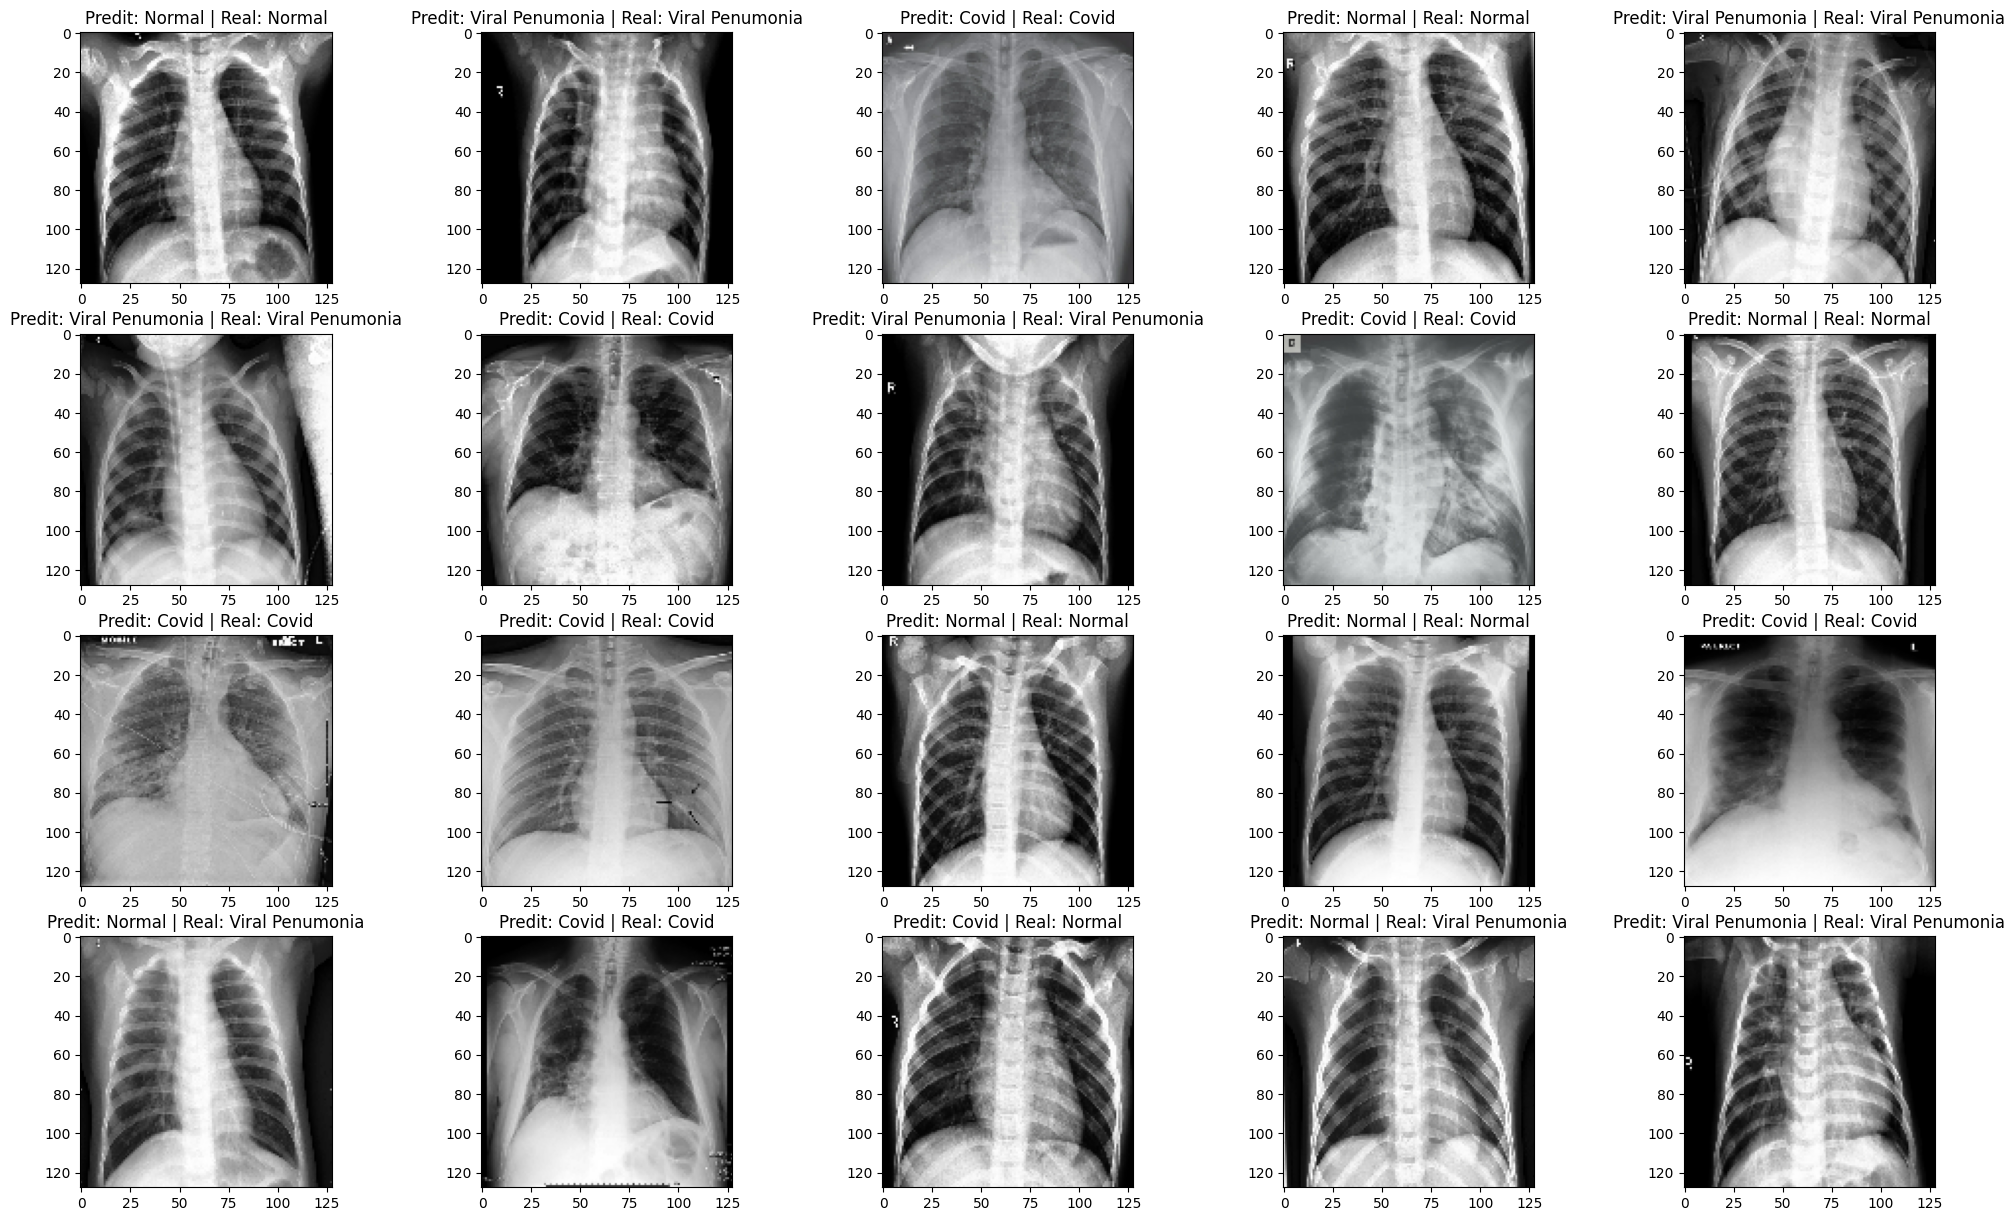

In [13]:
loaded_model = tf.keras.models.load_model("model/vgg16_best.h5")

# Print model summary
loaded_model.summary()
plt.figure(figsize=(25,15))
for images, labels in test_ds.take(1):
  classifications = loaded_model(images)
  # print(classifications)

  for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Predit: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [19]:
import numpy as np

# Assuming 'class_names' is defined as ['Covid', 'Normal', 'Viral Pneumonia']
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

# Function to preprocess the image for prediction
def preprocess_image(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.0  # Normalize to [0,1]
    return img_array

# Function to make predictions on a single image
def predict_single_image(image_path, model):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    return predicted_class

# Example usage:
image_path = "/content/drive/MyDrive/archive (6)/Covid19-dataset/test/Covid/0115.jpeg"
prediction = predict_single_image(image_path, loaded_model)
print(f"The predicted class is: {prediction}")


1/1 [==============================] - 0s 17ms/step
The predicted class is: Normal


In [18]:
# Function to preprocess the image for prediction
def preprocess_image(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.0  # Normalize to [0,1]
    return img_array

# Function to make predictions on a single image
def predict_single_image(image_path, model):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)

    # Get the index with the highest probability
    predicted_class_index = np.argmax(predictions)

    # Get the predicted class label
    predicted_class = class_names[predicted_class_index]

    # Optionally, print the raw probabilities for each class
    print("Raw Probabilities:", predictions)

    return predicted_class

# Example usage:
image_path = "/content/drive/MyDrive/archive (6)/Covid19-dataset/test/Covid/0108.jpeg"
prediction = predict_single_image(image_path, loaded_model)
print(f"The predicted class is: {prediction}")


1/1 [==============================] - 0s 19ms/step
Raw Probabilities: [[-0.04323256  1.5320164  -0.07401352]]
The predicted class is: Normal
